# Exploratory Data analysis on flight prices dataset (with feature engineering)

## Importing the dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Importing training dataset

In [ ]:
train_df = pd.read_excel('/content/Data_Train.xlsx')

In [ ]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
train_df.shape

(10683, 11)

## Importing test dataset

In [ ]:
test_df = pd.read_excel('/content/Test_set.xlsx')

In [ ]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
test_df.shape

(2671, 10)

## Combining Train and test dataset

In [ ]:
df = pd.concat([train_df, test_df], ignore_index= True)

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [ ]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
13353,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [ ]:
df.shape

(13354, 11)

## Data cleaning

In [ ]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [ ]:
df['Total_Stops'].describe()

count      13353
unique         5
top       1 stop
freq        7056
Name: Total_Stops, dtype: object

Since, no. of stops for any flight is mostly 1 (mode of the data = 1), so we can replace the null value with 1

In [ ]:
df['Total_Stops'].fillna(1, inplace = True)

In [ ]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
dtype: int64

In [ ]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4})

In [ ]:
df.drop('Route', axis = 1, inplace = True)

## Data Analysis

<Axes: ylabel='Source'>

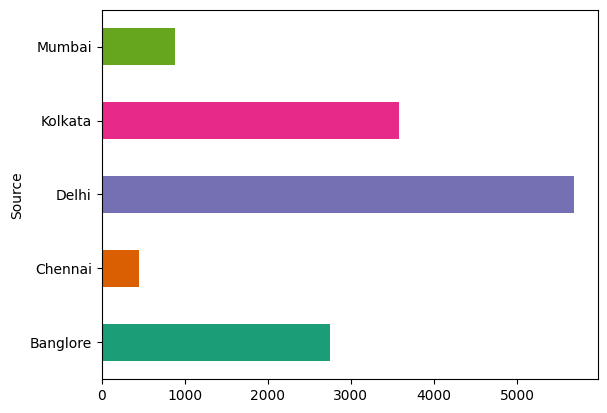

In [ ]:
df.groupby('Source').size().plot(kind = 'barh', color = sns.palettes.mpl_palette('Dark2'))

<Axes: ylabel='Destination'>

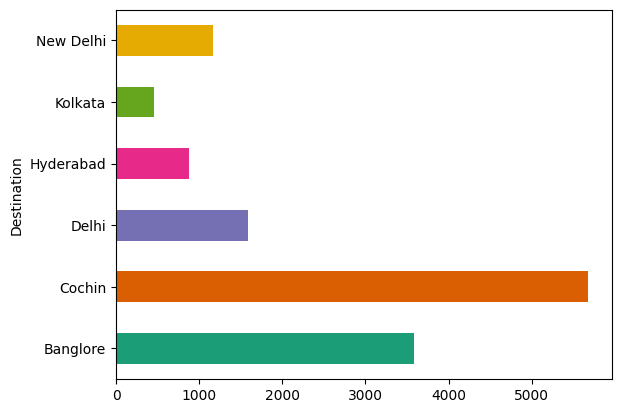

In [ ]:
df.groupby('Destination').size().plot(kind = 'barh', color = sns.palettes.mpl_palette('Dark2'))

<Axes: title={'center': 'Price v/s Destination'}, xlabel='Destination'>

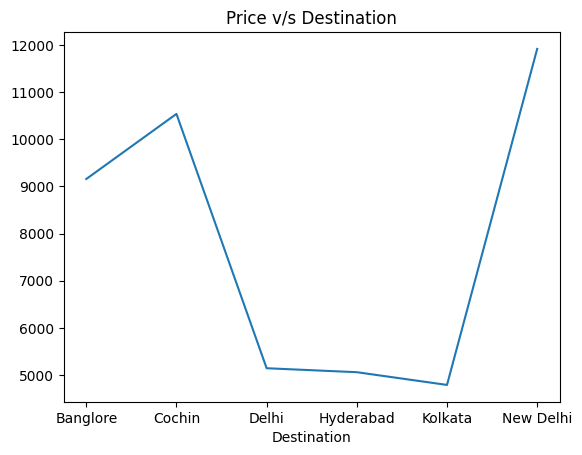

In [ ]:
df.groupby('Destination')['Price'].mean().plot(kind = 'line', title = 'Price v/s Destination')

<Axes: xlabel='Total_Stops'>

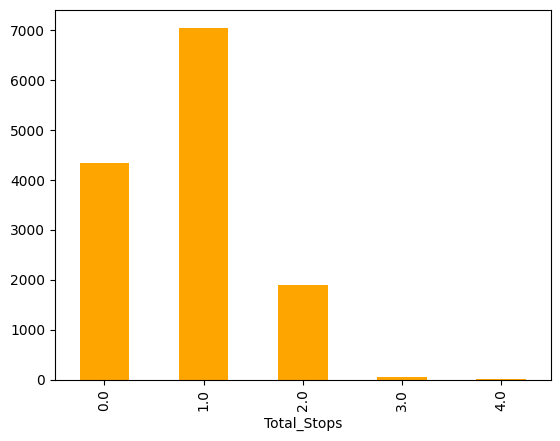

In [ ]:
df.groupby('Total_Stops').size().plot(kind = 'bar', color = 'orange')

<Axes: title={'center': 'Price v/s no. of stops'}, xlabel='Total_Stops'>

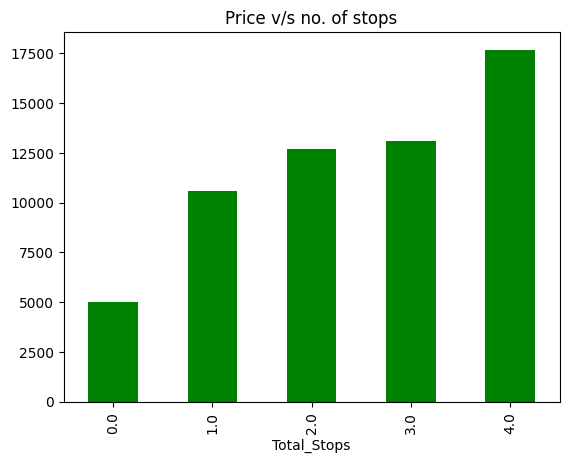

In [ ]:
df.groupby('Total_Stops')['Price'].mean().plot(kind='bar', color='g', title = 'Price v/s no. of stops')

<Axes: xlabel='Airline'>

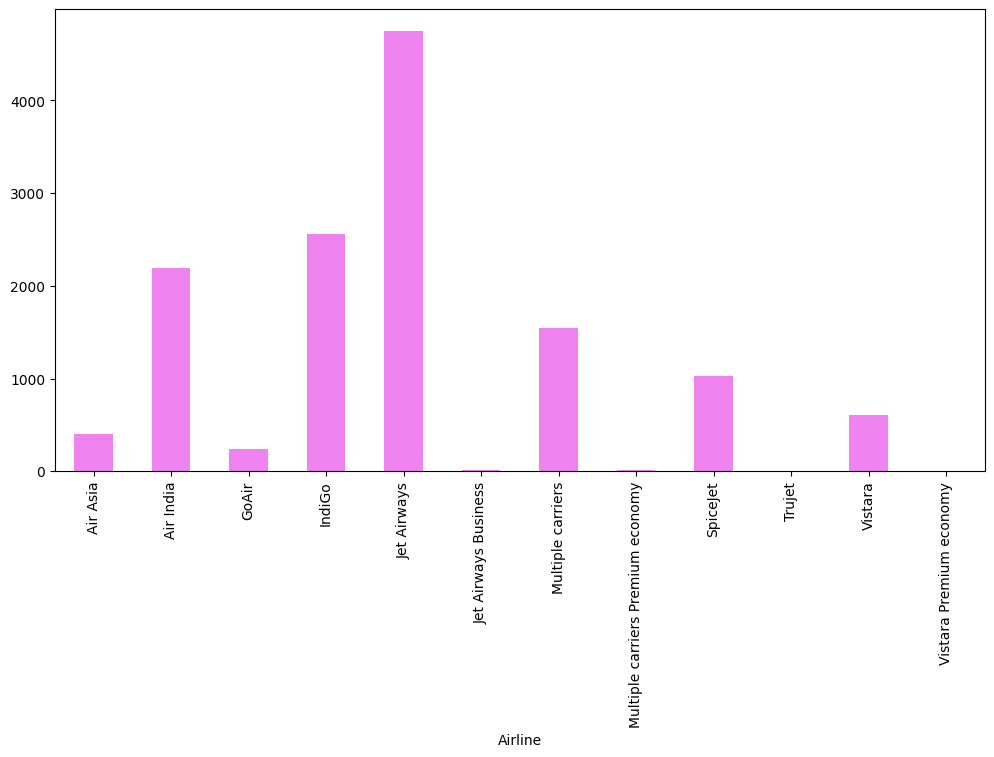

In [ ]:
df.groupby('Airline').size().plot(kind = 'bar', color = 'violet', figsize = (12,6))


<Axes: title={'center': 'Price v/s Airline'}, xlabel='Airline'>

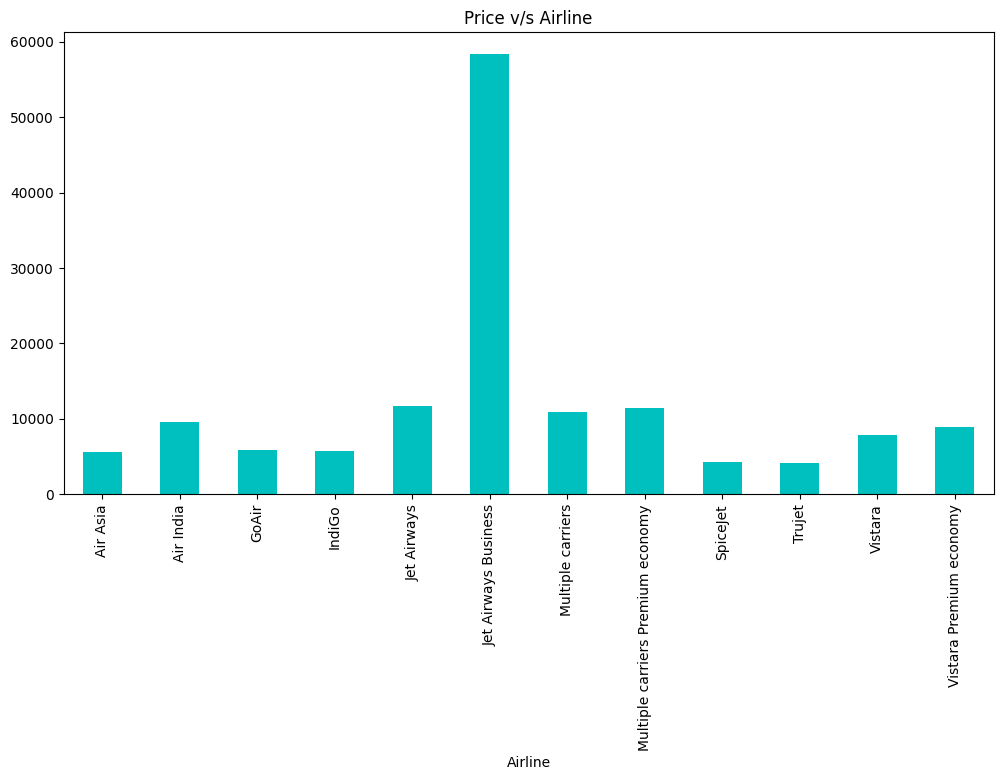

In [ ]:
df.groupby('Airline')['Price'].mean().plot(kind = 'bar', color = 'c',title = 'Price v/s Airline', figsize = (12,6))

## Derviving date-time features from the 'Date_of_Journey' column

In [ ]:
df[['Date', 'Month', 'Year']] = df['Date_of_Journey'].str.split('/', expand=True).astype('int64')

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2.0,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2.0,No info,13882.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1.0,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1.0,No info,13302.0,1,3,2019


In [ ]:
df.drop('Date_of_Journey', axis = 1, inplace = True)

In [ ]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2.0,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2.0,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1.0,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1.0,No info,13302.0,1,3,2019


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Dep_Time         13354 non-null  object 
 4   Arrival_Time     13354 non-null  object 
 5   Duration         13354 non-null  object 
 6   Total_Stops      13353 non-null  float64
 7   Additional_Info  13354 non-null  object 
 8   Price            10683 non-null  float64
 9   Date             13354 non-null  int64  
 10  Month            13354 non-null  int64  
 11  Year             13354 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 1.2+ MB


## Plots for date, time, year data

<Axes: ylabel='Frequency'>

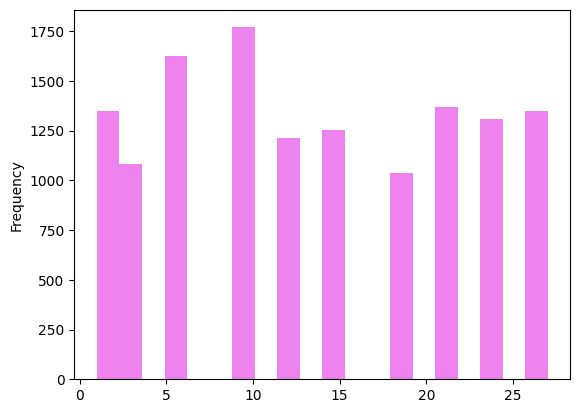

In [ ]:
df['Date'].plot(kind = 'hist', color = 'violet', bins=20)

<Axes: xlabel='Month'>

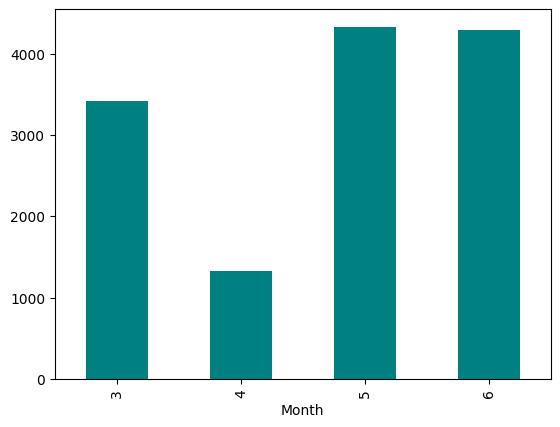

In [ ]:
df.groupby('Month').size().plot(kind = 'bar', color = 'teal')

<Axes: xlabel='Date'>

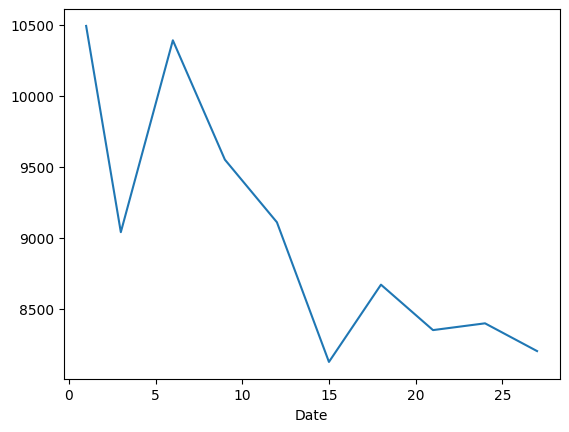

In [ ]:
df.groupby('Date')['Price'].mean().plot(kind='line')

<Axes: xlabel='Month'>

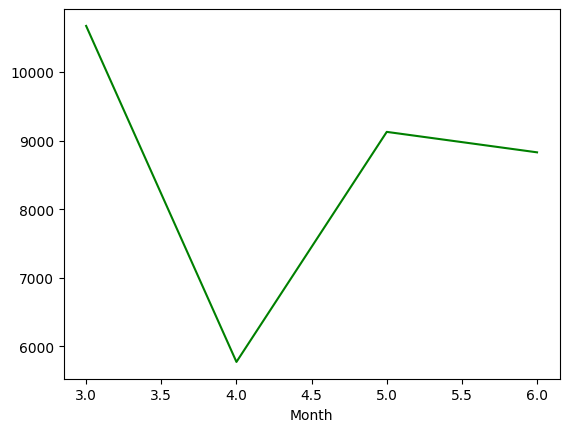

In [ ]:
df.groupby('Month')['Price'].mean().plot(kind = 'line', color = 'g')

## Arrival time

In [ ]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2.0,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2.0,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1.0,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1.0,No info,13302.0,1,3,2019


In arrival time, we don't need 22 Mar, we can get that from date, month, year. So, we can split the arrival time after the space.


In [ ]:
df['Arrival_Time'] = df['Arrival_Time'].str.split(' ').str[0]

In [ ]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,22:20,01:10,2h 50m,0.0,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2.0,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,09:25,04:25,19h,2.0,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1.0,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1.0,No info,13302.0,1,3,2019


Deriving the hour and minutes from the Arrival time

In [ ]:
df[['Arrival_hour', 'Arrival_minutes']] = df['Arrival_Time'].str.split(':', expand = True).astype(int)

In [ ]:
df.drop('Arrival_Time', axis = 1, inplace = True)

In [ ]:
df.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,22:20,2h 50m,0.0,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,05:50,7h 25m,2.0,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,09:25,19h,2.0,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,18:05,5h 25m,1.0,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,16:50,4h 45m,1.0,No info,13302.0,1,3,2019,21,35


## Departure Time

In [ ]:
df[['Departure_hour', 'Departure_minutes']] = df['Dep_Time'].str.split(':', expand = True).astype(int)

In [ ]:
df.drop('Dep_Time', axis = 1, inplace = True)

In [ ]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


## Plots for Arrival and Departure times

<Axes: title={'center': 'Freequency of flights v/s Arrival hour'}, xlabel='Arrival_hour'>

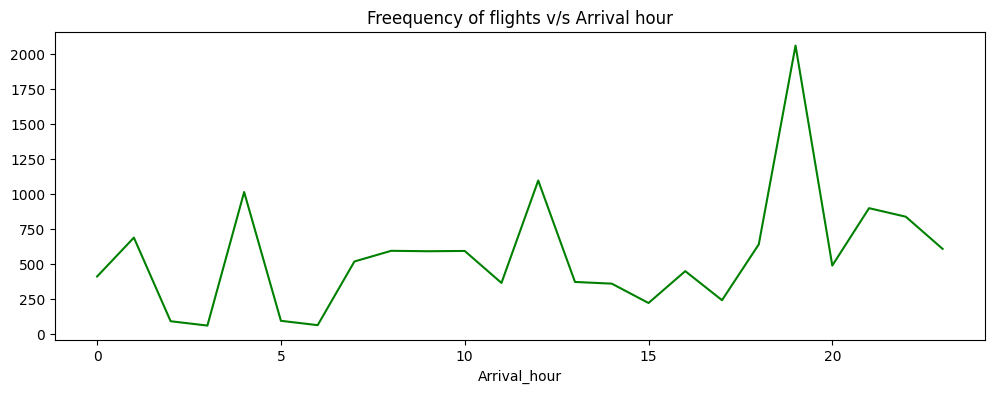

In [ ]:
df.groupby('Arrival_hour').size().plot(kind = 'line', color = 'g', title = 'Freequency of flights v/s Arrival hour', figsize = (12,4))

<Axes: title={'center': 'Freequency of flights v/s Departure hour'}, xlabel='Departure_hour'>

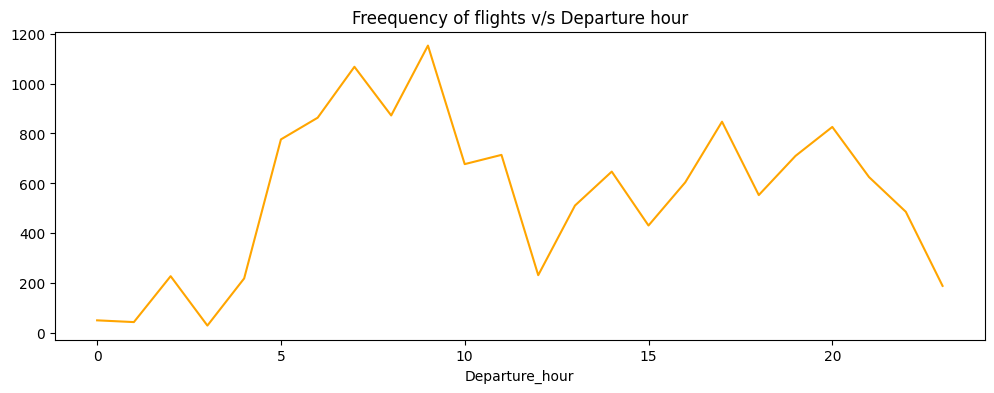

In [ ]:
df.groupby('Departure_hour').size().plot(kind = 'line', color = 'orange', title = 'Freequency of flights v/s Departure hour', figsize = (12,4))

## Addtional Info column

In [ ]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
df['Additional_Info'] = df['Additional_Info'].replace('No info', 'No Info')

In [ ]:
df['Additional_Info'].unique()

array(['No Info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
unique_info = df['Additional_Info'].unique()[1:]

In [ ]:
count = df['Additional_Info'].value_counts().drop('No Info')

In [ ]:
count

Additional_Info
In-flight meal not included     2426
No check-in baggage included     396
1 Long layover                    20
Change airports                    8
Business class                     5
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'In-flight meal not included'),
  Text(1, 0, 'No check-in baggage included'),
  Text(2, 0, '1 Short layover'),
  Text(3, 0, '1 Long layover'),
  Text(4, 0, 'Change airports'),
  Text(5, 0, 'Business class'),
  Text(6, 0, 'Red-eye flight'),
  Text(7, 0, '2 Long layover')])

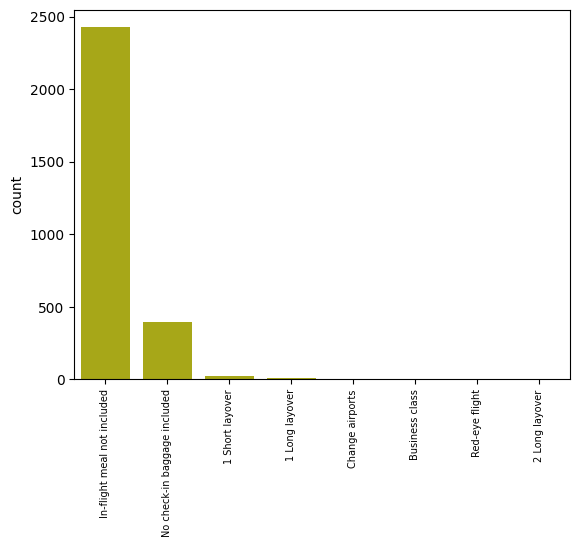

In [ ]:
sns.barplot(x = unique_info, y = count, color = 'y')
plt.xticks(rotation = 90, fontsize = 7)

## Duration column


In [ ]:
df[df['Duration'] == '5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes
6474,Air India,Mumbai,Hyderabad,5m,2.0,No Info,17327.0,6,3,2019,16,55,16,50
13343,Air India,Mumbai,Hyderabad,5m,2.0,No Info,NaN,12,3,2019,16,55,16,50


WE can see these entries have some mistake, the total duration from mumbai to hyderabad is given as 5 minutes, and also with two stops in between, it is not possible, so we remove these entries.

In [ ]:
df.drop(6474, axis = 0, inplace = True)
df.drop(13343, axis = 0, inplace = True)

In [ ]:
df.shape

(13352, 14)

Now we have to convert the duration into minutes.

In [ ]:
df['duration_hour'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0].astype(int)

In [ ]:
min = df['Duration'].str.split(' ').str[1]
min.fillna(0, inplace = True)
df['duration_min'] = min.str.split('m').str[0]
df['duration_min'].fillna(0, inplace = True)
df['duration_min'] = df['duration_min'].astype(int)

In [ ]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No Info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2.0,No Info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2.0,No Info,13882.0,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No Info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No Info,13302.0,1,3,2019,21,35,16,50,4,45


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13352 entries, 0 to 13353
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            13352 non-null  object 
 1   Source             13352 non-null  object 
 2   Destination        13352 non-null  object 
 3   Duration           13352 non-null  object 
 4   Total_Stops        13351 non-null  float64
 5   Additional_Info    13352 non-null  object 
 6   Price              10682 non-null  float64
 7   Date               13352 non-null  int64  
 8   Month              13352 non-null  int64  
 9   Year               13352 non-null  int64  
 10  Arrival_hour       13352 non-null  int64  
 11  Arrival_minutes    13352 non-null  int64  
 12  Departure_hour     13352 non-null  int64  
 13  Departure_minutes  13352 non-null  int64  
 14  duration_hour      13352 non-null  int64  
 15  duration_min       13352 non-null  int64  
dtypes: float64(2), int64(9), ob

In [ ]:
df['Total_time'] = df['duration_hour'] * 60 + df['duration_min']

In [ ]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes,duration_hour,duration_min,Total_time
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No Info,3897.0,24,3,2019,1,10,22,20,2,50,170
1,Air India,Kolkata,Banglore,7h 25m,2.0,No Info,7662.0,1,5,2019,13,15,5,50,7,25,445
2,Jet Airways,Delhi,Cochin,19h,2.0,No Info,13882.0,9,6,2019,4,25,9,25,19,0,1140
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No Info,6218.0,12,5,2019,23,30,18,5,5,25,325
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No Info,13302.0,1,3,2019,21,35,16,50,4,45,285


In [ ]:
df.drop(['duration_hour', 'duration_min', 'Duration'], axis = 1, inplace = True)

In [ ]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes,Total_time
0,IndiGo,Banglore,New Delhi,0.0,No Info,3897.0,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,2.0,No Info,7662.0,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2.0,No Info,13882.0,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1.0,No Info,6218.0,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1.0,No Info,13302.0,1,3,2019,21,35,16,50,285


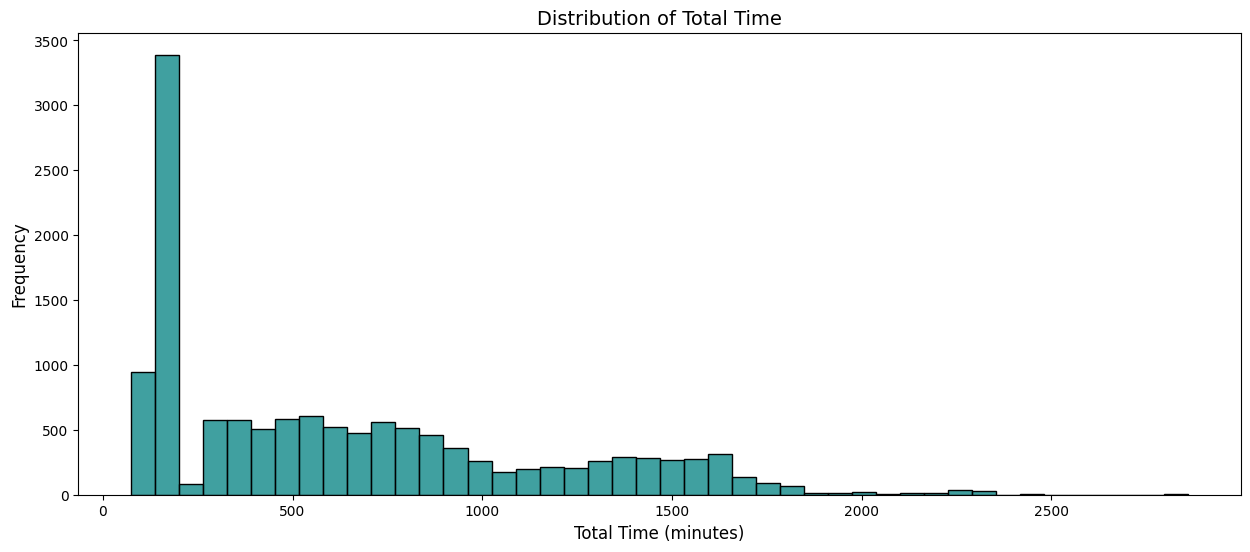

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='Total_time', color='teal')
plt.xlabel('Total Time (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Total Time', fontsize=14)
plt.show()

## Remaining columns and encoding

In [ ]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

we can use label encoding to encode the airline

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['Airline'] = le.fit_transform(df['Airline'])

In [ ]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes,Total_time
0,3,Banglore,New Delhi,0.0,No Info,3897.0,24,3,2019,1,10,22,20,170
1,1,Kolkata,Banglore,2.0,No Info,7662.0,1,5,2019,13,15,5,50,445
2,4,Delhi,Cochin,2.0,No Info,13882.0,9,6,2019,4,25,9,25,1140
3,3,Kolkata,Banglore,1.0,No Info,6218.0,12,5,2019,23,30,18,5,325
4,3,Banglore,New Delhi,1.0,No Info,13302.0,1,3,2019,21,35,16,50,285


In [ ]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
df['Source'] = le.fit_transform(df['Source'])

In [ ]:
df['Destination'] = le.fit_transform(df['Destination'])

In [ ]:
df['Additional_Info'] = le.fit_transform(df['Additional_Info'])

In [ ]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes,Total_time
0,3,0,5,0.0,6,3897.0,24,3,2019,1,10,22,20,170
1,1,3,0,2.0,6,7662.0,1,5,2019,13,15,5,50,445
2,4,2,1,2.0,6,13882.0,9,6,2019,4,25,9,25,1140
3,3,3,0,1.0,6,6218.0,12,5,2019,23,30,18,5,325
4,3,0,5,1.0,6,13302.0,1,3,2019,21,35,16,50,285


In [ ]:
# prompt: Using dataframe df: Now, give a machine learning code for predicting the flight ticket prices for the test dataset

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separate features and target
features = df.drop('Price', axis=1)
target = df['Price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the prices

ValueError: Input y contains NaN.

In [ ]:
df.shape

(13352, 14)

In [ ]:
df.isnull().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops             1
Additional_Info         0
Price                2670
Date                    0
Month                   0
Year                    0
Arrival_hour            0
Arrival_minutes         0
Departure_hour          0
Departure_minutes       0
Total_time              0
dtype: int64

In [ ]:
df['Total_Stops'].fillna(1, inplace = True)

In [ ]:
df.isnull().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops             0
Additional_Info         0
Price                2670
Date                    0
Month                   0
Year                    0
Arrival_hour            0
Arrival_minutes         0
Departure_hour          0
Departure_minutes       0
Total_time              0
dtype: int64

## Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
features = df.drop('Price', axis = 1)
target = df['Price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 101)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

ValueError: Input y contains NaN.